<a href="https://colab.research.google.com/github/MrRichard2104/MahonFitting/blob/master/N8N%20RPM_Sphere_7_01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Read the Excel file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file to Colab
uploaded = files.upload()

# Check the uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# Read the Excel file
file_name = "sphere7_01_1.xlsx"  # Make sure this matches the actual file name | Folder UNAM thesis > experiment 1-2 > Experiment 1 sin 120
excel_data = pd.read_excel(file_name, sheet_name=None)

# Iterate over all sheets
for sheet_name, df in excel_data.items():
    # Print the contents of each sheet
    print(f"\nContents  {sheet_name}:")
    print(df)

Saving sphere7_01_1.xlsx to sphere7_01_1.xlsx
Uploaded file: sphere7_01_1.xlsx

Contents  For T = 50°C :
      Time      CH101      CH102      CH103      CH104      CH105      CH106  \
0        0  25.515331  25.691287  24.690383  25.281473  26.233859  27.329133   
1        1  25.536131  25.713543  24.725961  25.357227  26.251958  27.364366   
2        2  25.551321  25.741025  24.748771  25.425823  26.279592  27.400879   
3        3  25.572726  25.768864  24.770901  25.487131  26.312921  27.433218   
4        4  25.605720  25.800583  24.806954  25.557419  26.349813  27.473471   
...    ...        ...        ...        ...        ...        ...        ...   
3416  3416  46.990862  48.579823  49.251346  49.658107  48.469784  49.025717   
3417  3417  46.996218  48.581073  49.248830  49.650434  48.474599  49.024102   
3418  3418  46.996543  48.581314  49.254066  49.650838  48.472844  49.026177   
3419  3419  47.000680  48.582398  49.251949  49.645292  48.473823  49.028097   
3420  3420  46.

Part 2: Apply the calibration on each column for each thermocouple

In [ ]:
# Equations in the form y = ax + b
equations = {
    "CH101": lambda x: 0.9872 * x + 0.3124,
    "CH102": lambda x: 0.9825 * x + 0.4450,
    "CH103": lambda x: 0.9753 * x + 0.6583,
    "CH104": lambda x: 0.9798 * x + 0.5537,
    "CH105": lambda x: 0.9796 * x + 0.5936,
    "CH106": lambda x: 0.9875 * x + 0.3843,
    "CH107": lambda x: 0.9828 * x + 0.5135,
    "CH108": lambda x: 0.9893 * x + 0.3365,
}

# Iterate over all sheets
for sheet_name, df in excel_data.items():
    # Apply the operation on each column
    for column in df.columns[1:]:
        if column in equations:
            df[column] = equations[column](df[column])


Part 3: Print corrected data and Save to Excel

In [ ]:
for sheet_name, df in excel_data.items():
    print(f"\nCorrected Data for {sheet_name}:")
    print(df)

    corrected_file_name = f"corrected_data_{sheet_name}.xlsx"
    df.to_excel(corrected_file_name, index=False)
    print(f"\nCorrected data saved to {corrected_file_name}")



Corrected Data for For T = 50°C :
      Time      CH101      CH102      CH103      CH104      CH105      CH106  \
0        0  25.501135  25.686689  24.738830  25.324487  26.292288  27.371819   
1        1  25.521668  25.708556  24.773530  25.398711  26.310018  27.406612   
2        2  25.536664  25.735558  24.795776  25.465921  26.337088  27.442668   
3        3  25.557795  25.762909  24.817360  25.525991  26.369737  27.474603   
4        4  25.590366  25.794073  24.852522  25.594859  26.405877  27.514353   
...    ...        ...        ...        ...        ...        ...        ...   
3416  3416  46.701779  48.174676  48.693138  49.208713  48.074600  48.797196   
3417  3417  46.707066  48.175904  48.690684  49.201195  48.079317  48.795601   
3418  3418  46.707387  48.176141  48.695790  49.201592  48.077598  48.797650   
3419  3419  46.711471  48.177206  48.693726  49.196157  48.078557  48.799546   
3420  3420  46.707225  48.181509  48.695544  49.195759  48.083430  48.797005   

    

Part 4: Plotting for each set of temperature form 50°C to 80°C

<ipython-input-4-3d42b07c9cd2>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


Saved plot to: plots/experimental_data_For_T_50_C.png


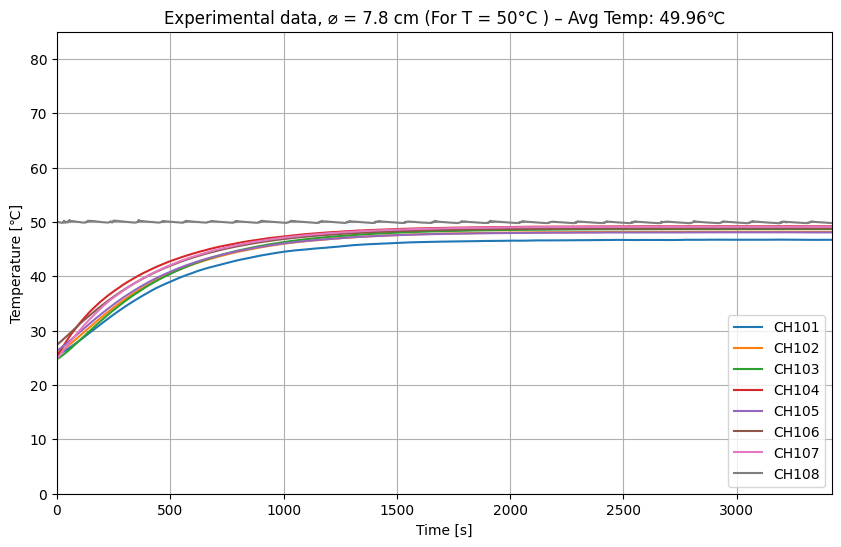

Saved plot to: plots/experimental_data_For_T_60_C.png


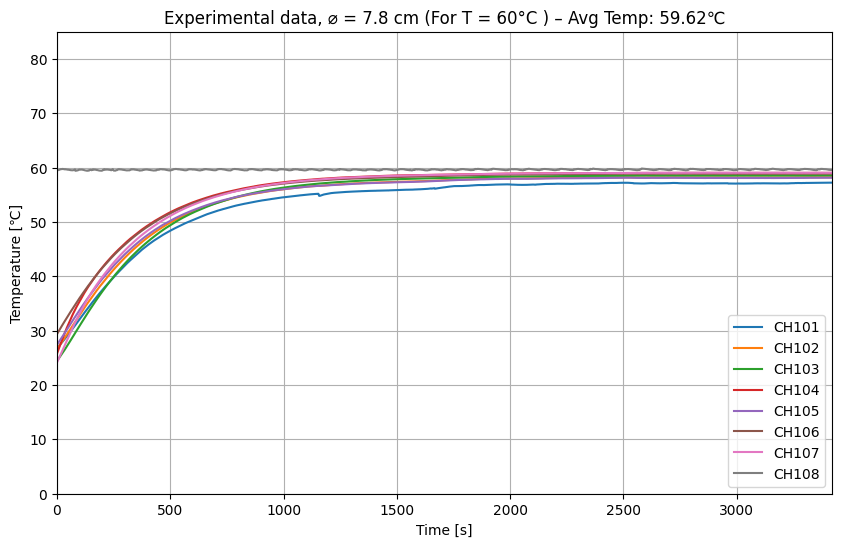

Saved plot to: plots/experimental_data_For_T_70_C.png


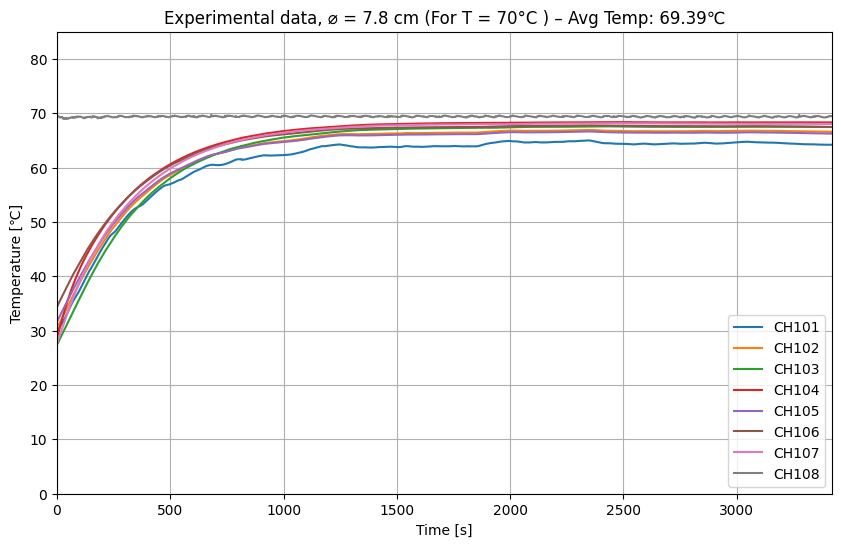

Saved plot to: plots/experimental_data_For_T_80_C.png


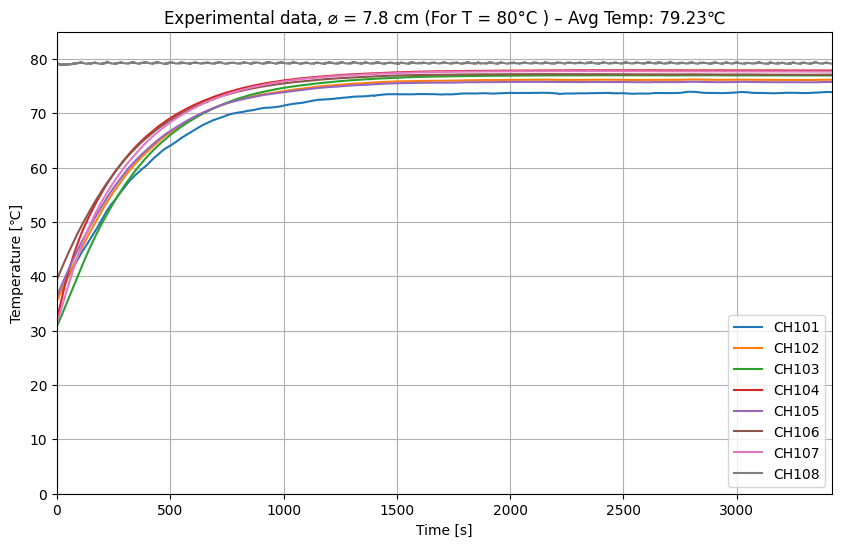

In [ ]:
import os
import re
import matplotlib.pyplot as plt

# ensure our output folder exists
os.makedirs("plots", exist_ok=True)

for sheet_name, df in excel_data.items():
    plt.figure(figsize=(10, 6))

    # color‐cycle & legend handles
    legend_handles = []
    cmap = plt.cm.get_cmap('tab10')

    for i, column in enumerate(df.columns[1:], start=0):
        color = cmap(i % cmap.N)
        line, = plt.plot(df['Time'], df[column], label=column, color=color)
        legend_handles.append(line)

    avg_temp = df.iloc[:, -1].mean()
    plt.title(f'Experimental data, ⌀ = 7.8 cm ({sheet_name}) – Avg Temp: {avg_temp:.2f}℃')
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature [℃]')
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.0, 0.0), loc='lower right')
    plt.grid(True)
    plt.xlim(0, 3420)
    plt.ylim(0, 85)

    # sanitize sheet_name into a safe filename
    safe_name = re.sub(r'[^0-9A-Za-z]+', '_', sheet_name).strip('_')
    out_png = os.path.join("plots", f"experimental_data_{safe_name}.png")

    # save then show
    plt.savefig(out_png, dpi=300, bbox_inches='tight')
    print(f"Saved plot to: {out_png}")
    plt.show()


# Part 5: Applying all the coeficients ***a***, ***b*** and ***c*** from the Rational Polynomial Method (RPM) to the calibrated (corrected data)


In [ ]:
import pandas as pd

# Define the RPM function
def rpm(t, a, b, c):
    return (a + b*t) / (1 + c*t)

# Define the parameters for each sheet : Folder : RPM calcul - Name file : Coeff_RPM Sphere_7_0X_X.xlsx
#'Thermocouple': [a, b, c],
parameters = {
    'For T = 50°C ': {
        'CH101': [21.77660, 0.16495, 0.00329559],
        'CH102': [21.98870, 0.16495, 0.00329559],
        'CH103': [20.76410, 0.18291, 0.00350366],
        'CH104': [22.90350, 0.23501, 0.00453881],
        'CH105': [17.32680, 0.26941, 0.00532647],
        'CH106': [24.26100, 0.19512, 0.00377382],
        'CH107': [13.85790, 0.35431, 0.00691121],
    },
    'For T = 60°C ': {
        'CH101': [21.89580, 0.25434, 0.00418339],
        'CH102': [21.89580, 0.25434, 0.00418339],
        'CH103': [18.61570, 0.28952, 0.00463188],
        'CH104': [22.03190, 0.35273, 0.00568432],
        'CH105': [22.63110, 0.29342, 0.00477317],
        'CH106': [25.00900, 0.30916, 0.00498726],
        'CH107': [12.93800, 0.44778, 0.0072293],
    },
    'For T = 70°C ': {
        'CH101': [23.50990, 0.39665, 0.0058479],
        'CH102': [24.42920, 0.39665, 0.0058479],
        'CH103': [20.47870, 0.37679, 0.00524604],
        'CH104': [22.76850, 0.48272, 0.00674366],
        'CH105': [25.87810, 0.39562, 0.00565901],
        'CH106': [29.12930, 0.40161, 0.00566103],
        'CH107': [21.95860, 0.43710, 0.00608925],
    },
    'For T = 80°C ': {
        'CH101': [29.58100, 0.38206, 0.00489464],
        'CH102': [28.77820, 0.38206, 0.00489464],
        'CH103': [15.35030, 0.54368, 0.00668412],
        'CH104': [26.41910, 0.54006, 0.00661469],
        'CH105': [30.10470, 0.43183, 0.00540754],
        'CH106': [33.58370, 0.44928, 0.00554708],
        'CH107': [24.97700, 0.50493, 0.00616579],
    },
}

# List of sheet names
sheet_names = ['For T = 50°C ', 'For T = 60°C ', 'For T = 70°C ', 'For T = 80°C ']

# Apply the RPM to each column of each sheet
for sheet_name in sheet_names:
    # Load the corrected data
    corrected_data = pd.read_excel(f"corrected_data_{sheet_name}.xlsx")

    # Get the 't' values from the corrected data
    t = corrected_data['Time']

    # Apply the RPM to each column (except the last one and 'Time')
    for column in corrected_data.columns[1:-1]:  # Skip the 'Time' column
        a, b, c = parameters[sheet_name][column]
        corrected_data[column] = rpm(t, a, b, c)

    # Save the new data
    rpm_file_name = f"RPM_data_{sheet_name}.xlsx"
    corrected_data.to_excel(rpm_file_name, index=False)
    print(f"\nRPM data saved to {rpm_file_name}")



RPM data saved to RPM_data_For T = 50°C .xlsx

RPM data saved to RPM_data_For T = 60°C .xlsx

RPM data saved to RPM_data_For T = 70°C .xlsx

RPM data saved to RPM_data_For T = 80°C .xlsx


Part 6: Do the comparison between *experimental data* (X-abscisse) and *RPM data* (Y-abscisse)

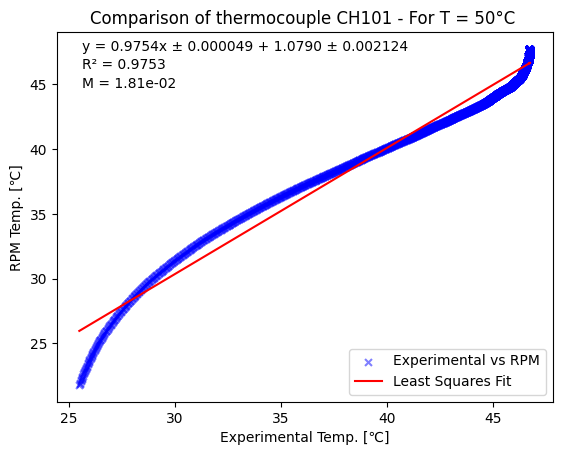

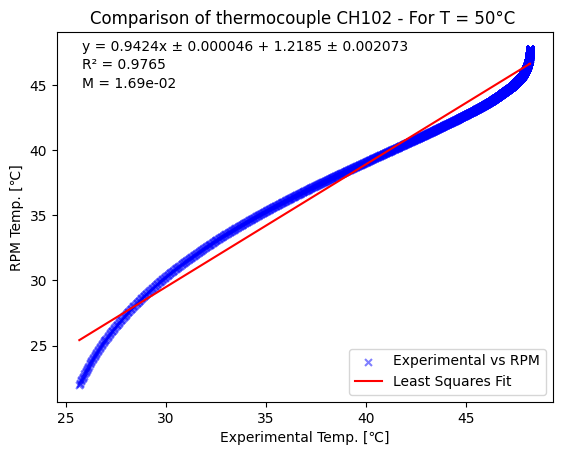

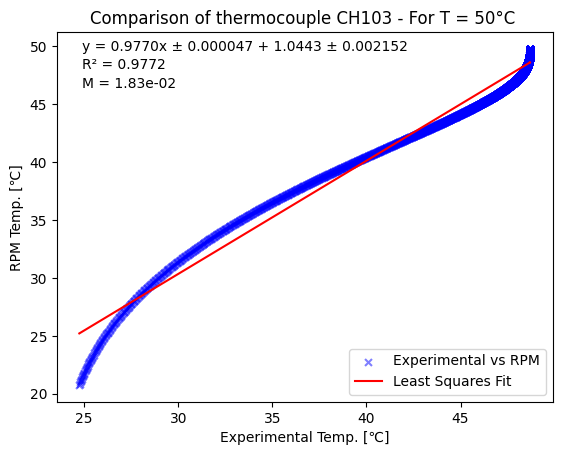

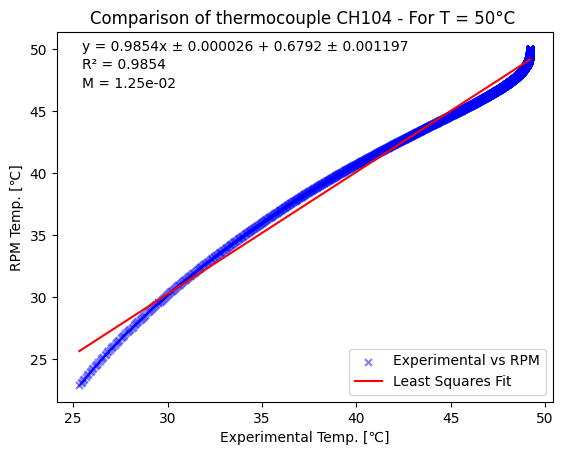

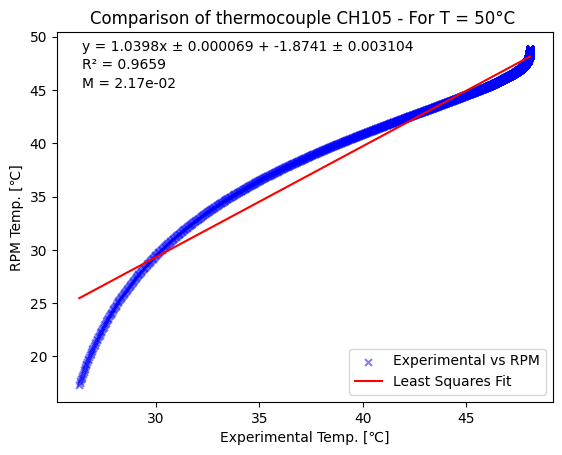

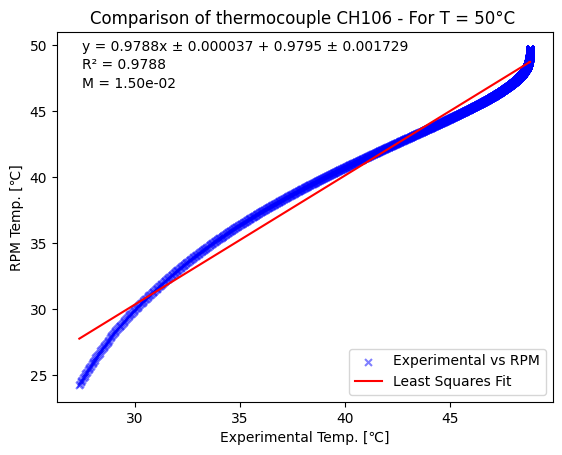

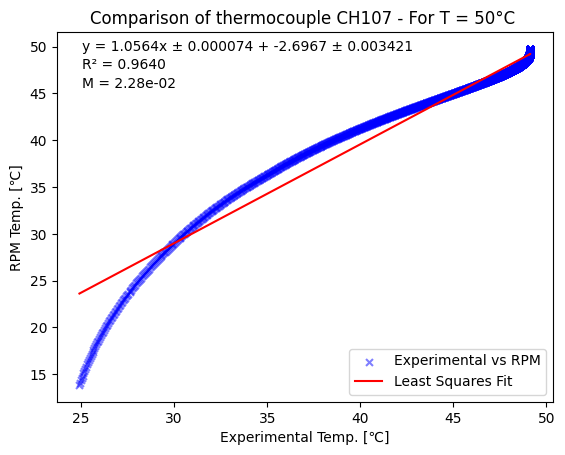

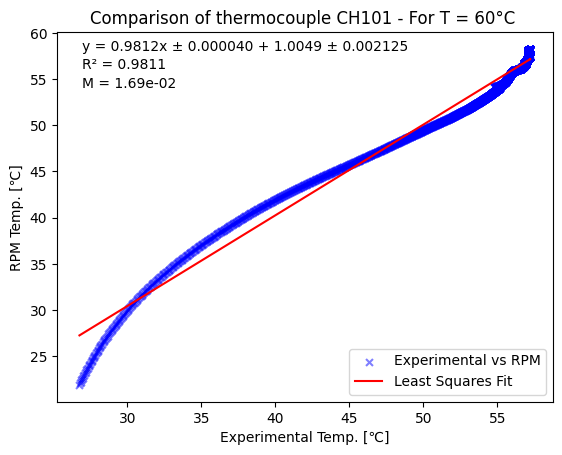

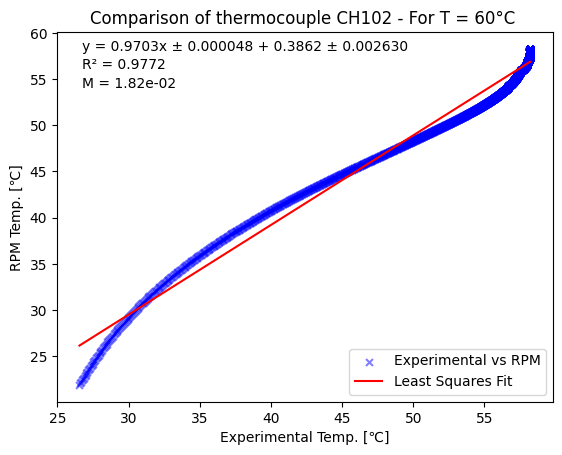

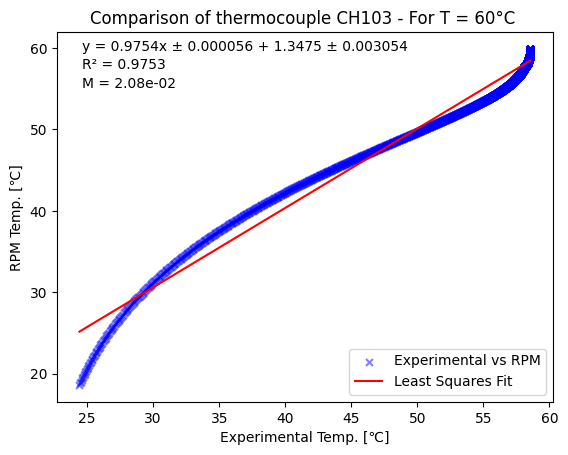

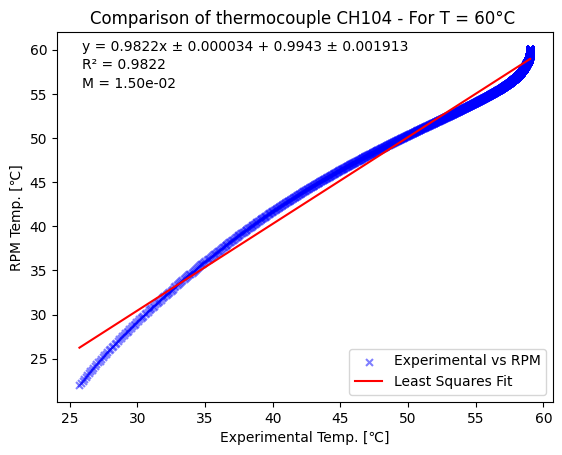

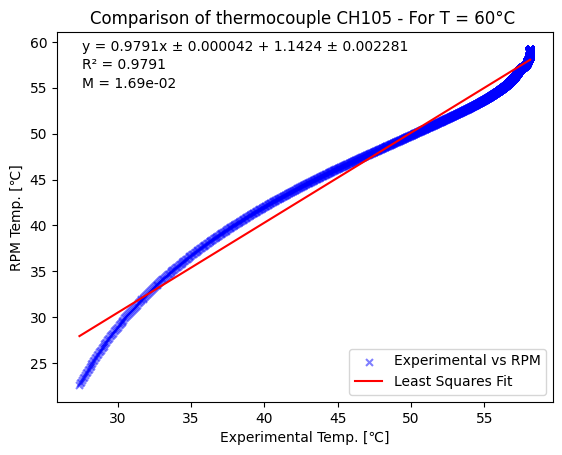

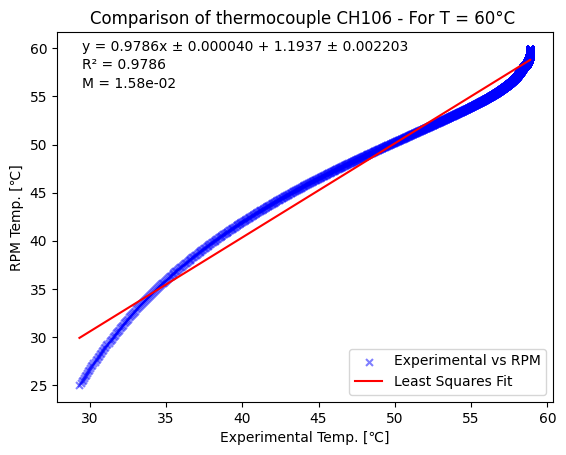

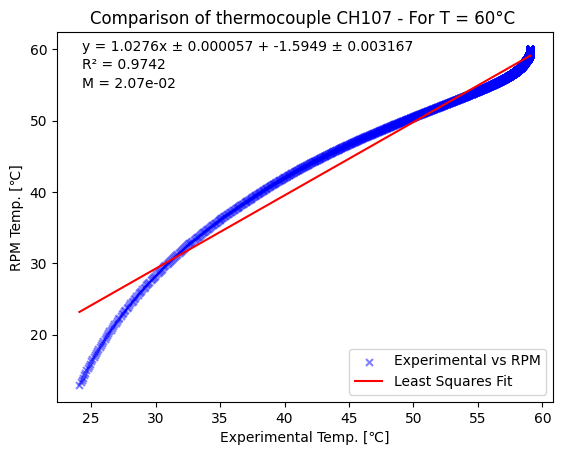

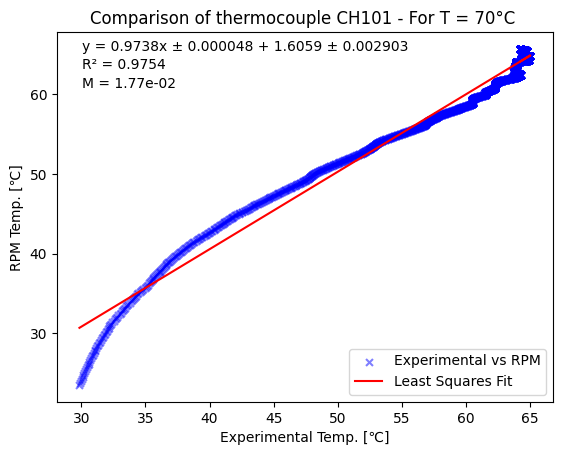

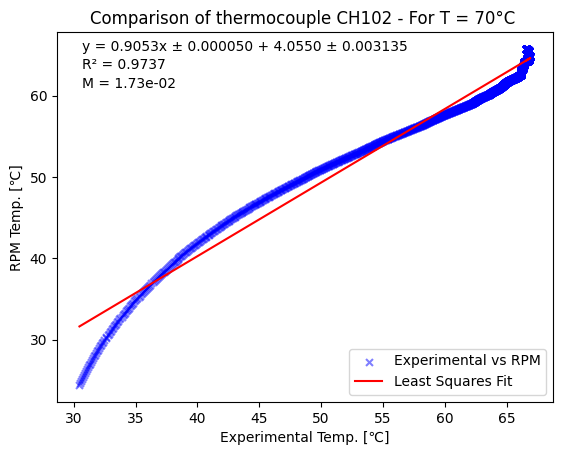

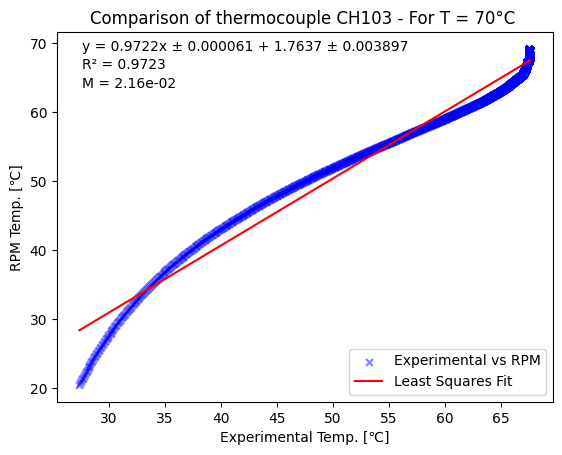

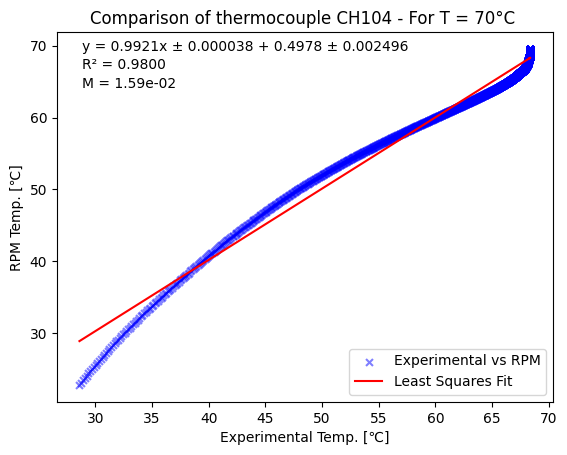

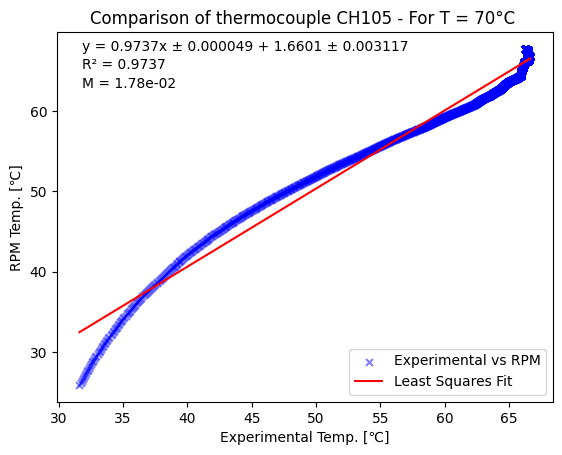

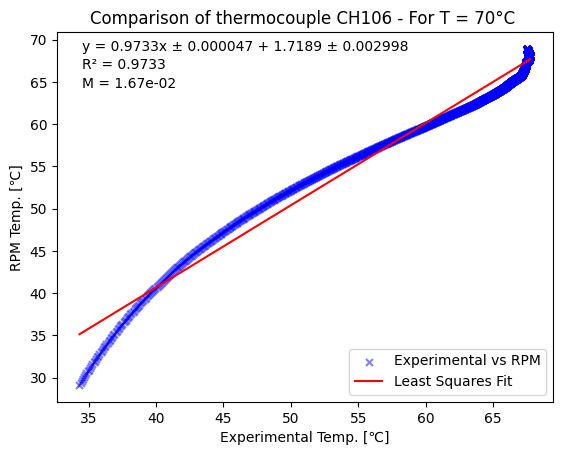

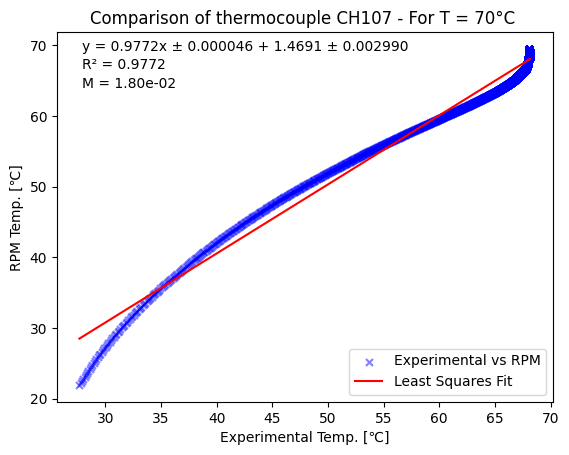

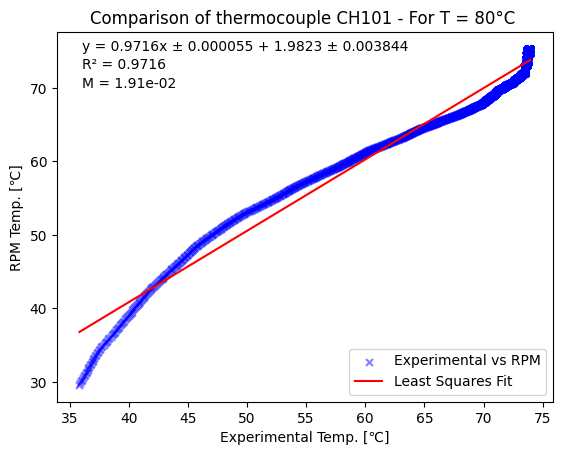

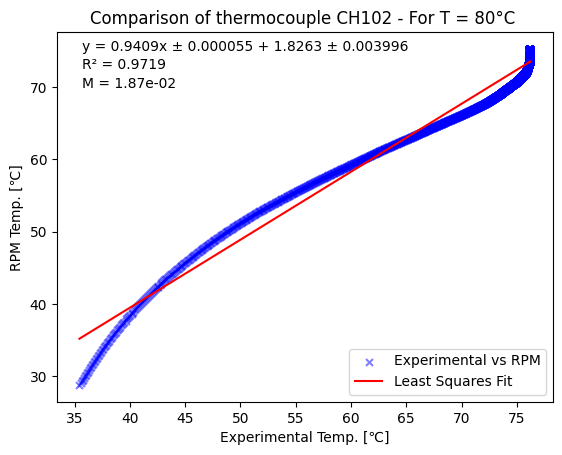

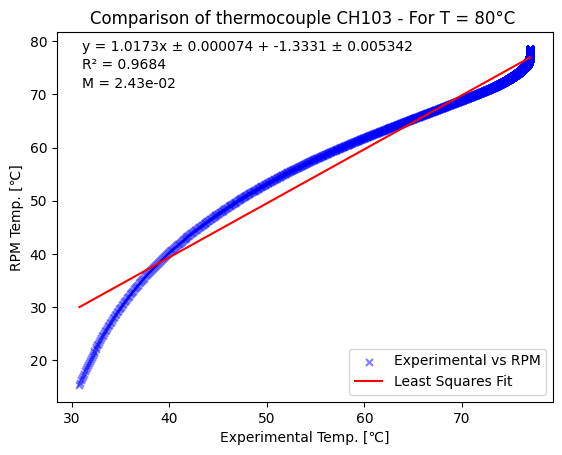

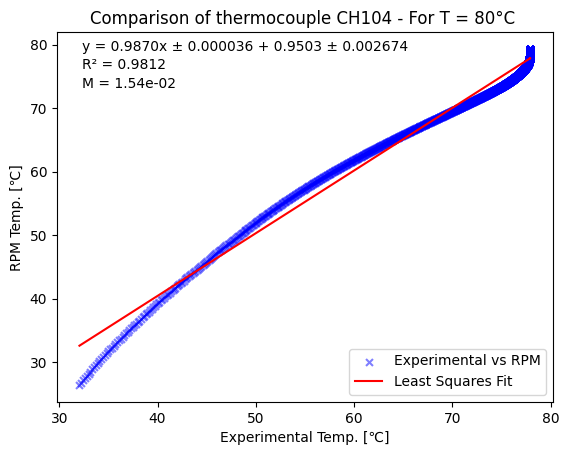

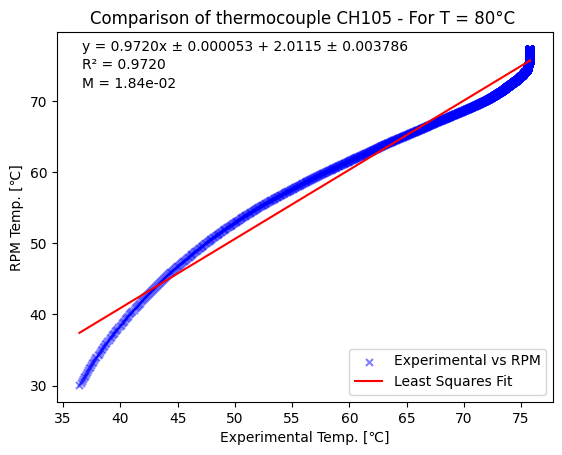

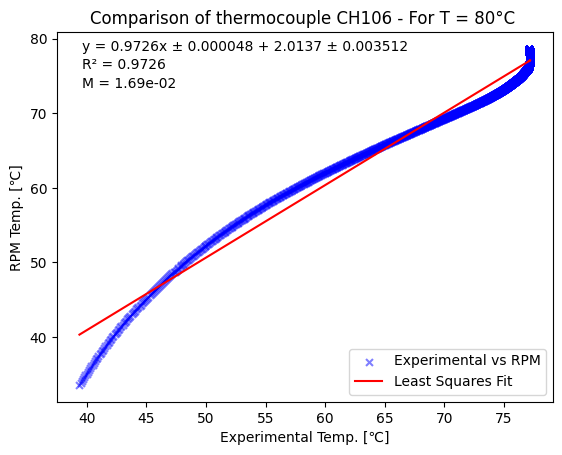

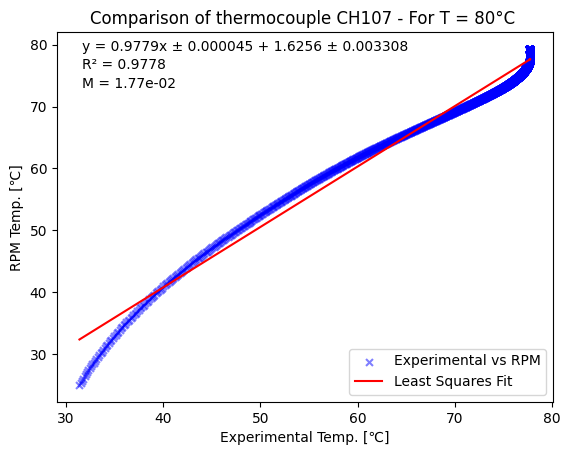

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import re
import os
os.makedirs("plots", exist_ok=True)


# List of sheet names
sheet_names = ['For T = 50°C ', 'For T = 60°C ', 'For T = 70°C ', 'For T = 80°C ']

# Process each sheet in the Excel files
for sheet_name in sheet_names:
    # Load the Excel files
    df_x = pd.read_excel(f"corrected_data_{sheet_name}.xlsx")
    df_y = pd.read_excel(f"RPM_data_{sheet_name}.xlsx")

    # Get the column names
    columns = df_x.columns[1:]  # Start from the second column

    # Create an empty list to store the results
    results = []

    # Process each pair of columns (xi, yi)
    for i in range(0, len(columns) - 1):  # Exclude the last column
        x_column = columns[i]
        y_column = columns[i]  # The y_column is the same as the x_column

        # Check if the corresponding column exists
        if y_column not in df_y.columns:
            continue

        # Fit a linear regression model to the data
        model = LinearRegression()
        X = df_x[x_column].values.reshape(-1, 1)
        y = df_y[y_column].values
        model.fit(X, y)

        # Get the equation of the line
        slope = model.coef_[0]
        intercept = model.intercept_
        r_squared = model.score(X, y)

        # Calculate the residuals
        predictions = model.predict(X)
        residuals = y - predictions

        # Calculate M
        M = np.sqrt(np.sum(residuals**2) / np.sum(X**2))

        # Calculate the standard deviation of the slope and intercept
        slope_std_err = np.sqrt(np.sum(residuals**2) / np.sum(y**2) * (1 - r_squared) / (len(X) - 2))
        intercept_std_err = np.sqrt(np.sum(residuals**2) / np.sum(y**2) * (1 - r_squared) / (len(X) - 2) + np.mean(X)**2 * slope_std_err**2)

        # Calculate the equation with errors
        equation = f'y = {slope:.4f} ± {slope_std_err:.6f}x + {intercept:.4f} ± {intercept_std_err:.6f}'

        # Append the results to the list
        results.append([f'{x_column}', f'{slope:.6f}', f'{slope_std_err:.6f}', f'{intercept:.4f}', f'{intercept_std_err:.4f}', r_squared, M, equation])

        # Plot the data and the fitted line
        plt.figure()
        plt.scatter(X, y, s=25, marker='x', alpha=0.5, color='blue', label=f'Experimental vs RPM')
        plt.plot(X, model.predict(X), color='red', label=f'Least Squares Fit')
        plt.text(0.05, 0.95, f'y = {slope:.4f}x ± {slope_std_err:.6f} + {intercept:.4f} ± {intercept_std_err:.6f}', transform=plt.gca().transAxes)
        plt.text(0.05, 0.90, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes)
        plt.text(0.05, 0.85, f'M = {M:.2e}', transform=plt.gca().transAxes)
        plt.title(f'Comparison of thermocouple {y_column} - {sheet_name}')
        plt.xlabel('Experimental Temp. [℃]')
        plt.ylabel('RPM Temp. [℃]')
        plt.legend(loc='lower right')

        # Save to disk (choose your directory and filename pattern)
        out_png = f"plot_{sheet_name.strip().replace(' ','_')}_{x_column}.png"
        plt.savefig(out_png, dpi=300, bbox_inches='tight')

        out_png = os.path.join("plots",
           f"plot_{sheet_name.strip().replace(' ','_')}_{x_column}.png")
        plt.savefig(out_png, dpi=300, bbox_inches='tight')


        plt.show()

    # Create the DataFrame from the results list
    results_df = pd.DataFrame(results, columns=['Thermocouple','Slope (a)','Slope SE','Intercept (b)','Intercept SE','R²','M','Equation'])

    # Save the results to a CSV file
    results_df.to_csv(f'RPM_linear_regression_7_01_1_{sheet_name}.csv', index=False)

In [ ]:
import os

print("Current working directory:", os.getcwd())
print("\nPNG files in /content:")
!ls -1 /content/*.png || echo "— no png files found —"



#!ls

Current working directory: /content

PNG files in /content:
'/content/plot_For_T_=_50°C_CH101.png'
'/content/plot_For_T_=_50°C_CH102.png'
'/content/plot_For_T_=_50°C_CH103.png'
'/content/plot_For_T_=_50°C_CH104.png'
'/content/plot_For_T_=_50°C_CH105.png'
'/content/plot_For_T_=_50°C_CH106.png'
'/content/plot_For_T_=_50°C_CH107.png'
'/content/plot_For_T_=_60°C_CH101.png'
'/content/plot_For_T_=_60°C_CH102.png'
'/content/plot_For_T_=_60°C_CH103.png'
'/content/plot_For_T_=_60°C_CH104.png'
'/content/plot_For_T_=_60°C_CH105.png'
'/content/plot_For_T_=_60°C_CH106.png'
'/content/plot_For_T_=_60°C_CH107.png'
'/content/plot_For_T_=_70°C_CH101.png'
'/content/plot_For_T_=_70°C_CH102.png'
'/content/plot_For_T_=_70°C_CH103.png'
'/content/plot_For_T_=_70°C_CH104.png'
'/content/plot_For_T_=_70°C_CH105.png'
'/content/plot_For_T_=_70°C_CH106.png'
'/content/plot_For_T_=_70°C_CH107.png'
'/content/plot_For_T_=_80°C_CH101.png'
'/content/plot_For_T_=_80°C_CH102.png'
'/content/plot_For_T_=_80°C_CH103.png'
'/co

Part 7 : Difference

<ipython-input-8-26b8662093f0>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


Saved plot to: plots_rpm/rpm_data_For_T_50_C.png


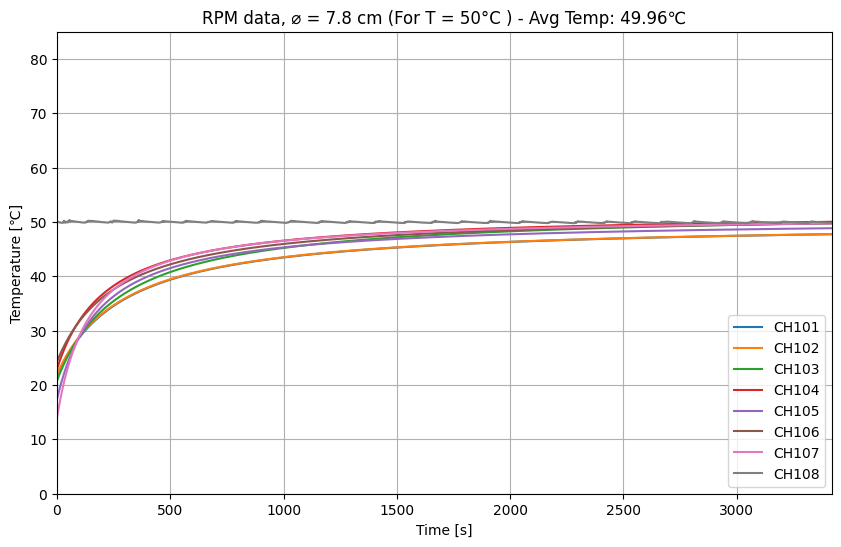

<ipython-input-8-26b8662093f0>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


Saved plot to: plots_rpm/rpm_data_For_T_60_C.png


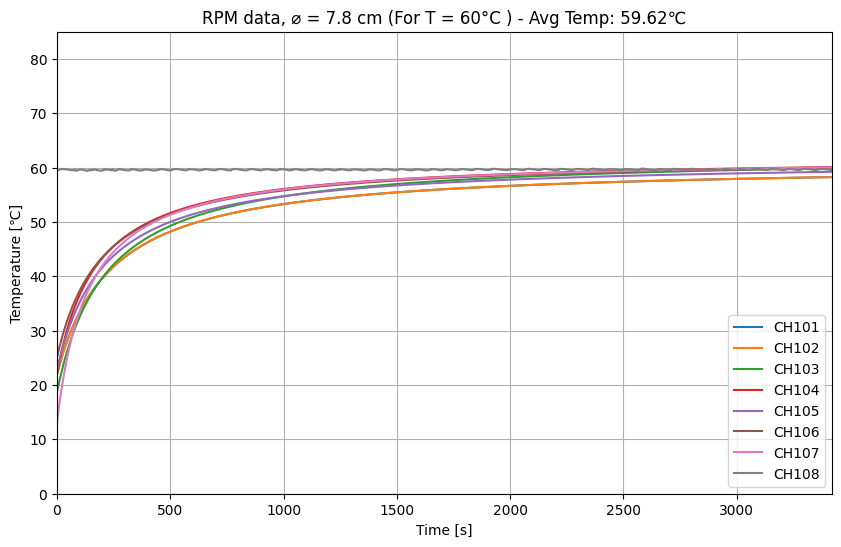

<ipython-input-8-26b8662093f0>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


Saved plot to: plots_rpm/rpm_data_For_T_70_C.png


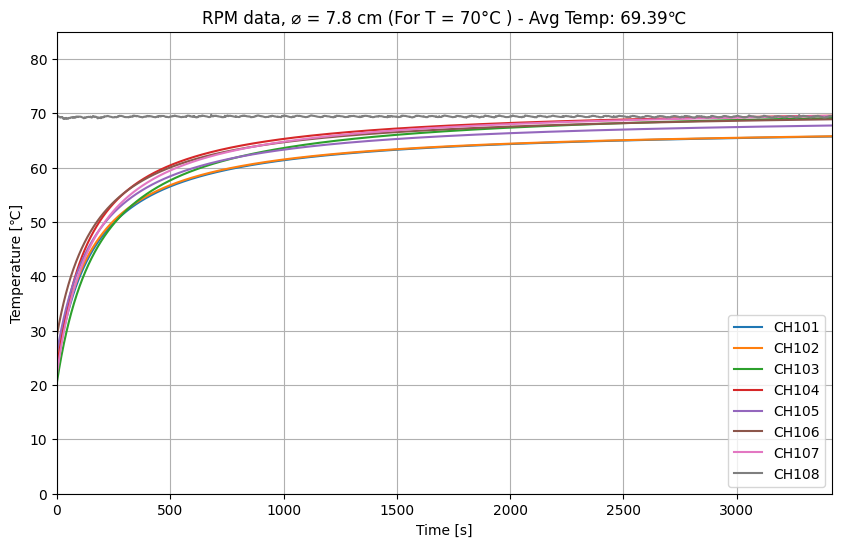

<ipython-input-8-26b8662093f0>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


Saved plot to: plots_rpm/rpm_data_For_T_80_C.png


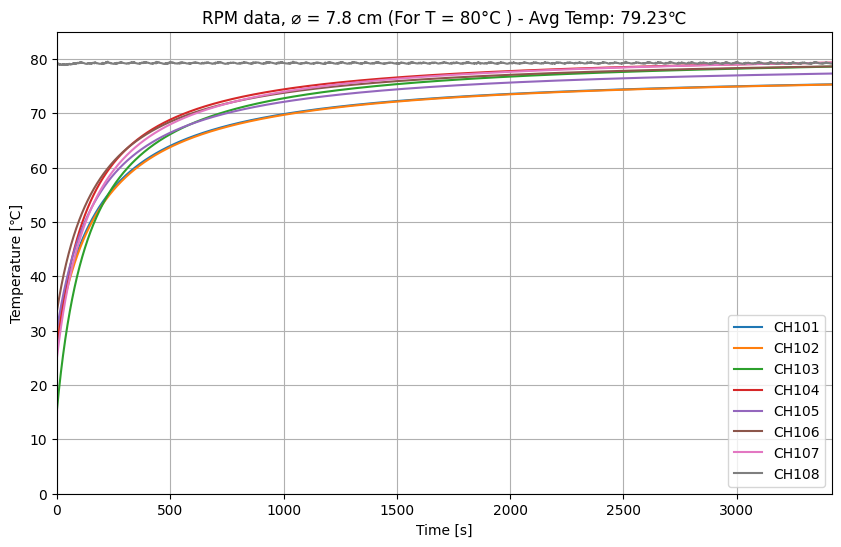

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd

# make our output folder
os.makedirs("plots_rpm", exist_ok=True)

# your sheet names
sheet_names = ['For T = 50°C ', 'For T = 60°C ', 'For T = 70°C ', 'For T = 80°C ']

for sheet_name in sheet_names:
    # Load the RPM data
    # (adjust the filename logic here if you’ve cleaned up the sheet_name elsewhere)
    df = pd.read_excel(f"RPM_data_{sheet_name}.xlsx")

    plt.figure(figsize=(10, 6))
    legend_handles = []
    cmap = plt.cm.get_cmap('tab10')

    # plot each column vs. Time
    for i, column in enumerate(df.columns[1:]):
        color = cmap(i % cmap.N)
        line, = plt.plot(df['Time'], df[column], label=column, color=color)
        legend_handles.append(line)

    avg_temp = df.iloc[:, -1].mean()
    plt.title(f'RPM data, ⌀ = 7.8 cm ({sheet_name}) - Avg Temp: {avg_temp:.2f}℃')
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature [℃]')
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.0, 0.0), loc='lower right')
    plt.grid(True)
    plt.xlim(0, 3420)
    plt.ylim(0, 85)

    # build a safe filename
    safe_name = re.sub(r'[^0-9A-Za-z]+', '_', sheet_name).strip('_')
    out_png = os.path.join("plots_rpm", f"rpm_data_{safe_name}.png")

    # save then show
    plt.savefig(out_png, dpi=300, bbox_inches='tight')
    print(f"Saved plot to: {out_png}")
    plt.show()


Thermocouple from RPM dta plot separately

Working dir: /content
All Excel files: ['corrected_data_For T = 50°C .xlsx', 'corrected_data_For T = 80°C .xlsx', 'sphere7_01_1.xlsx', 'corrected_data_For T = 60°C .xlsx', 'corrected_data_For T = 70°C .xlsx', 'RPM_data_For T = 70°C .xlsx', 'RPM_data_For T = 80°C .xlsx', 'RPM_data_For T = 60°C .xlsx', 'RPM_data_For T = 50°C .xlsx']
→ Using RPM_data_For T = 50°C .xlsx for sheet For T = 50°C


<ipython-input-9-011b3d114b61>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i))


   Saved plots_rpm/RPM_For_T_50_C_CH101.png


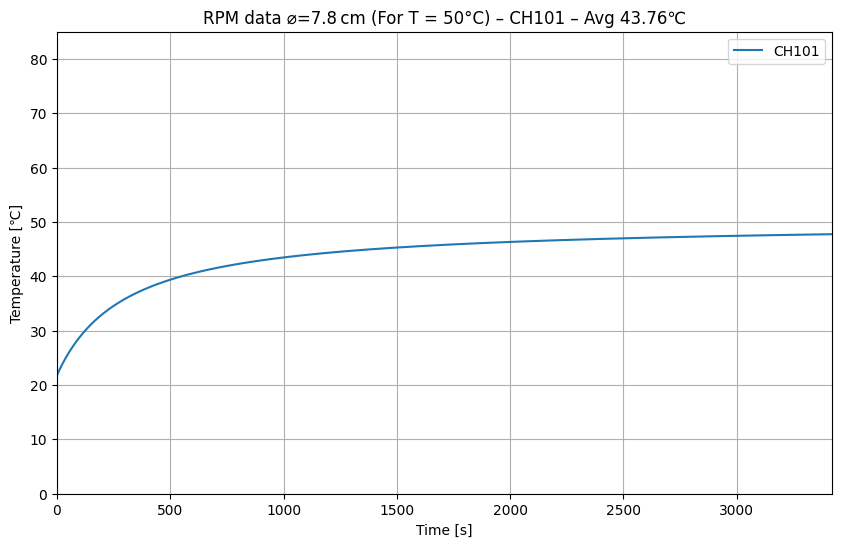

   Saved plots_rpm/RPM_For_T_50_C_CH102.png


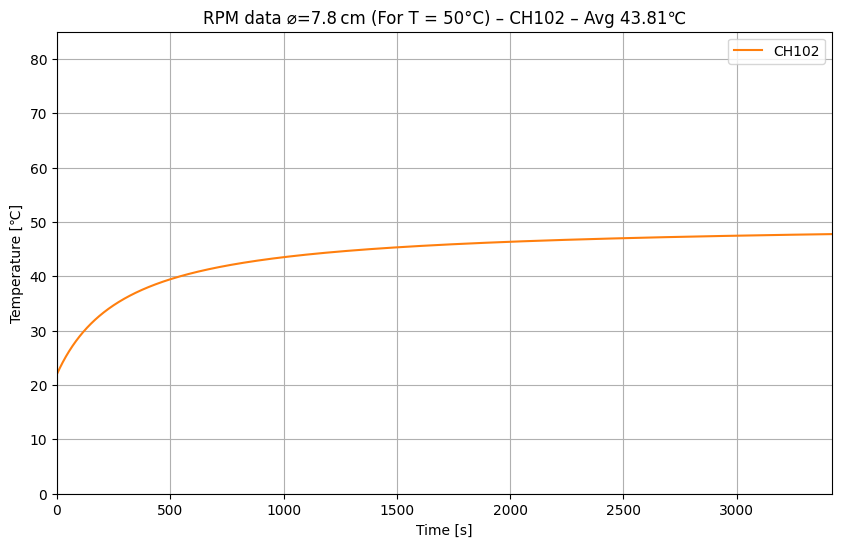

   Saved plots_rpm/RPM_For_T_50_C_CH103.png


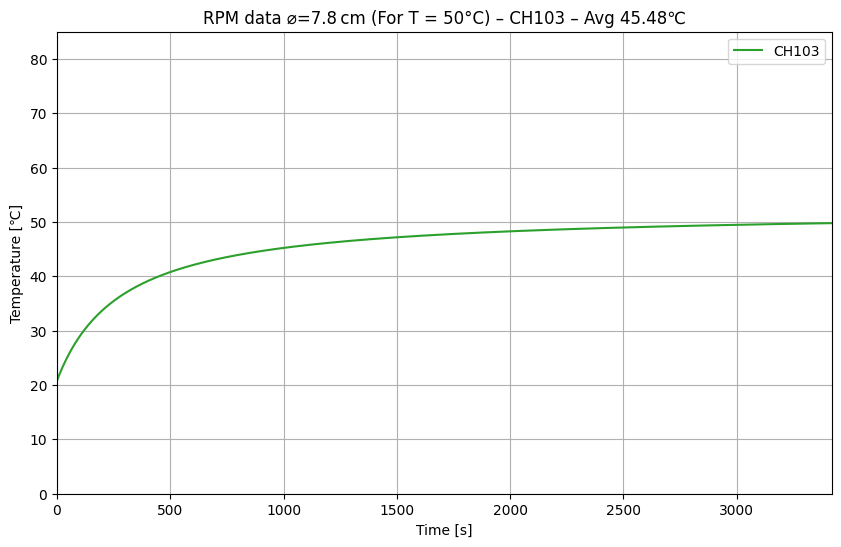

   Saved plots_rpm/RPM_For_T_50_C_CH104.png


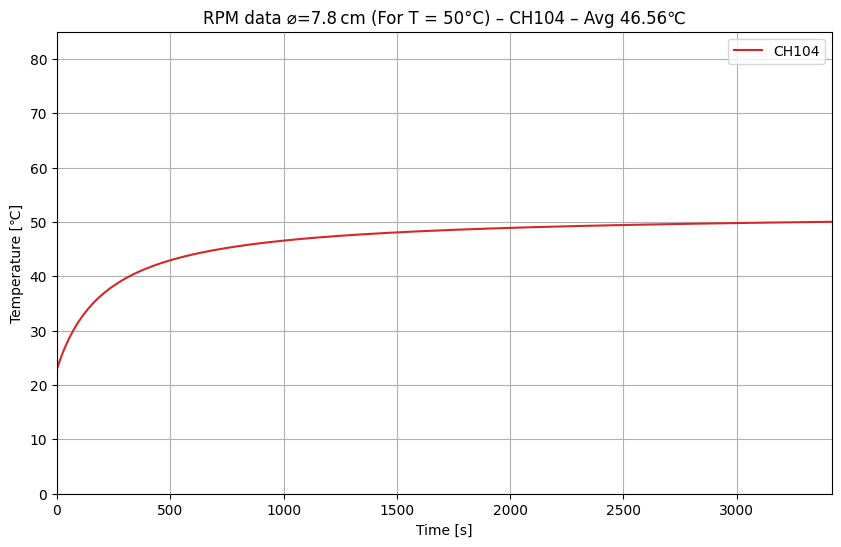

   Saved plots_rpm/RPM_For_T_50_C_CH105.png


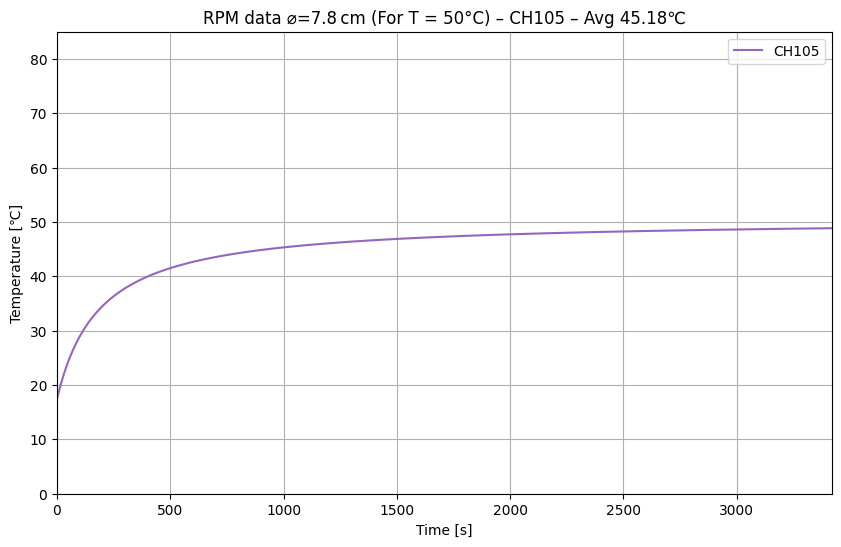

   Saved plots_rpm/RPM_For_T_50_C_CH106.png


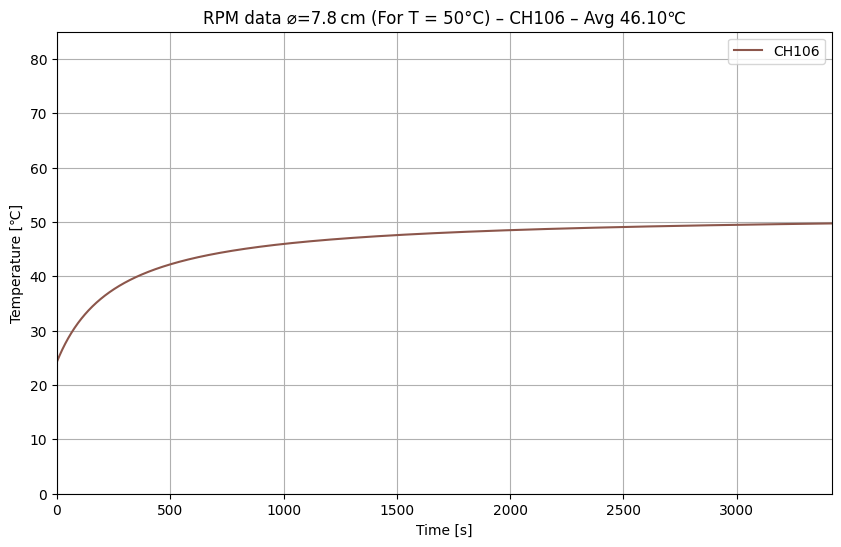

   Saved plots_rpm/RPM_For_T_50_C_CH107.png


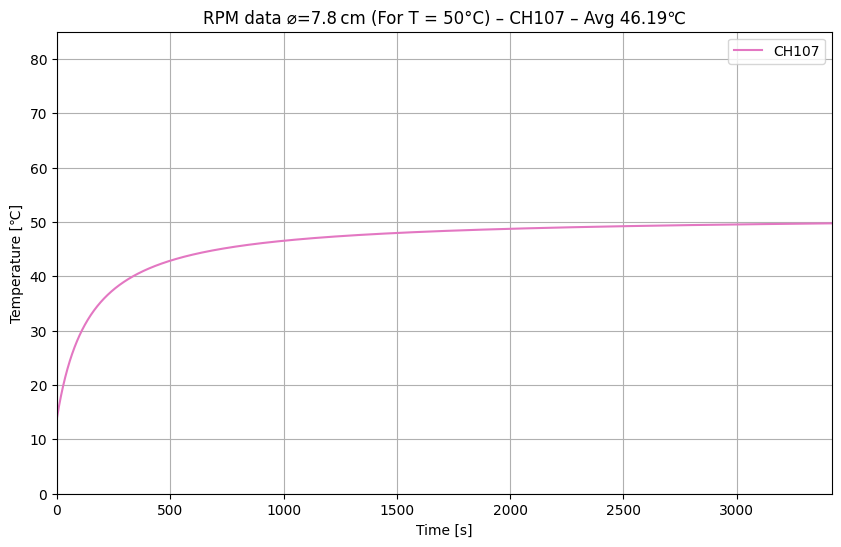

   Saved plots_rpm/RPM_For_T_50_C_CH108.png


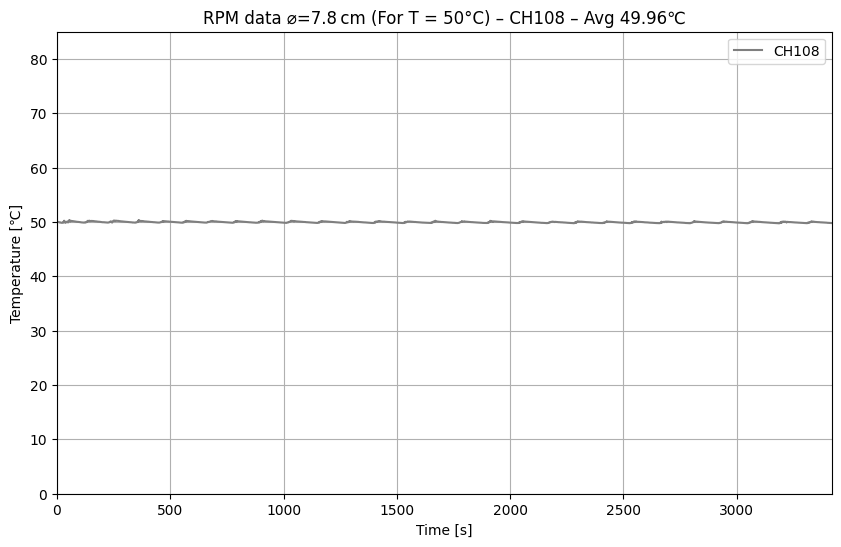

→ Using RPM_data_For T = 60°C .xlsx for sheet For T = 60°C


<ipython-input-9-011b3d114b61>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i))


   Saved plots_rpm/RPM_For_T_60_C_CH101.png


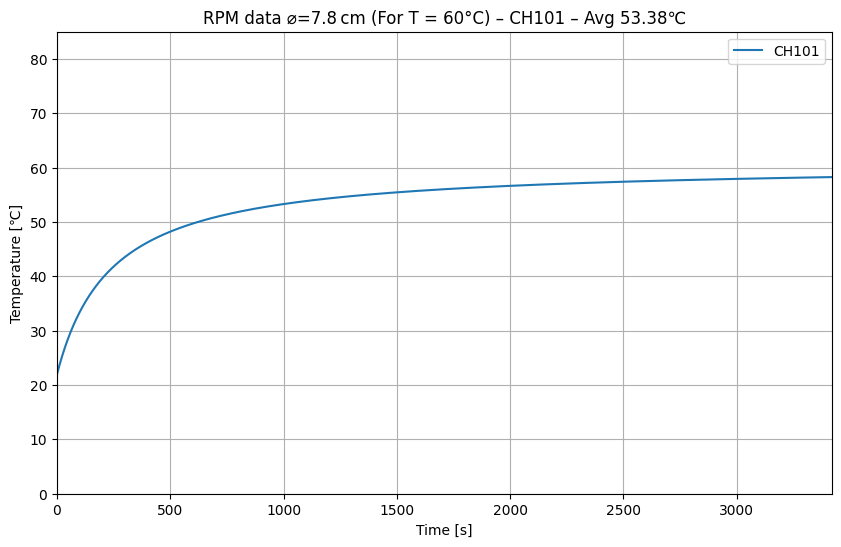

   Saved plots_rpm/RPM_For_T_60_C_CH102.png


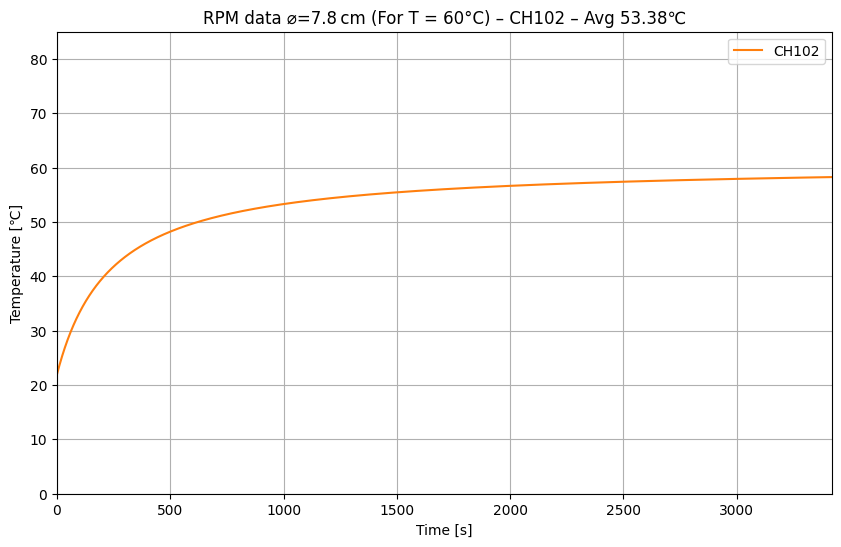

   Saved plots_rpm/RPM_For_T_60_C_CH103.png


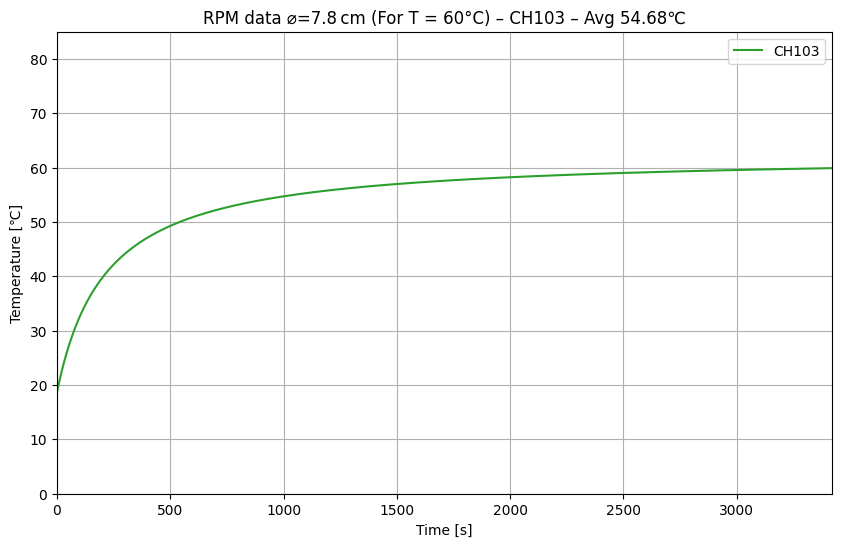

   Saved plots_rpm/RPM_For_T_60_C_CH104.png


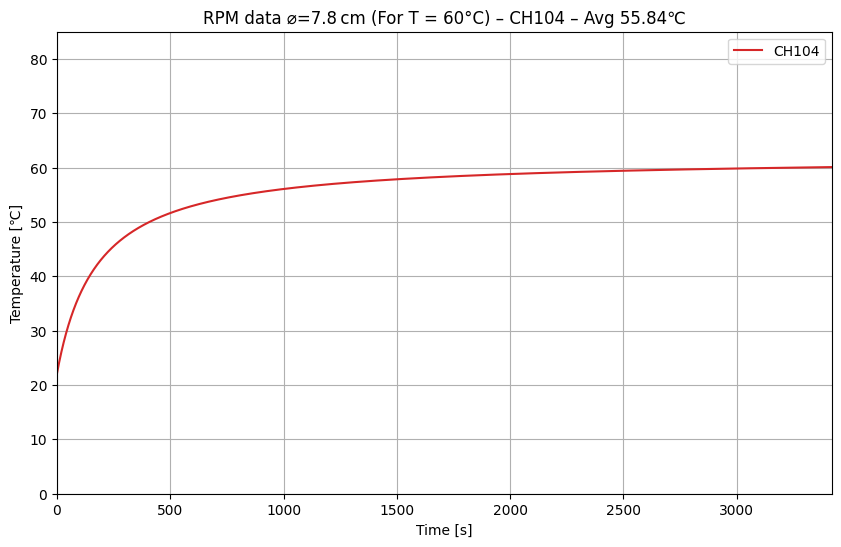

   Saved plots_rpm/RPM_For_T_60_C_CH105.png


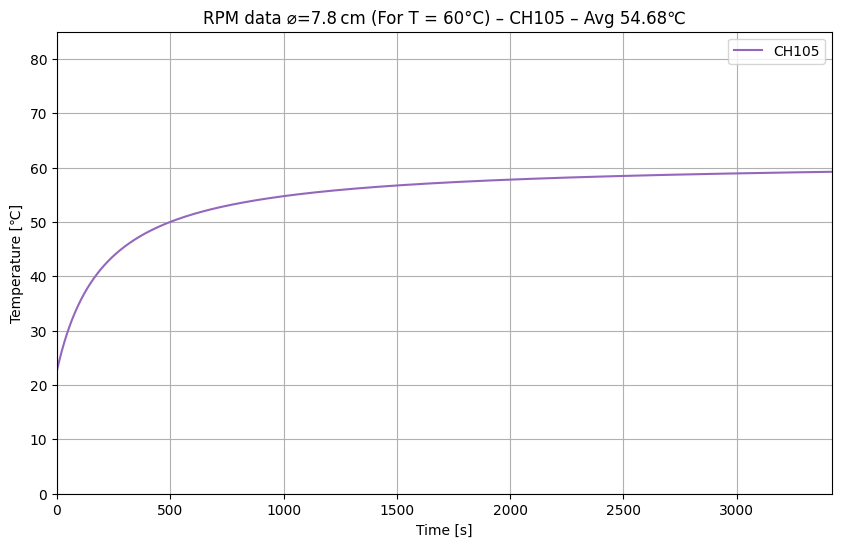

   Saved plots_rpm/RPM_For_T_60_C_CH106.png


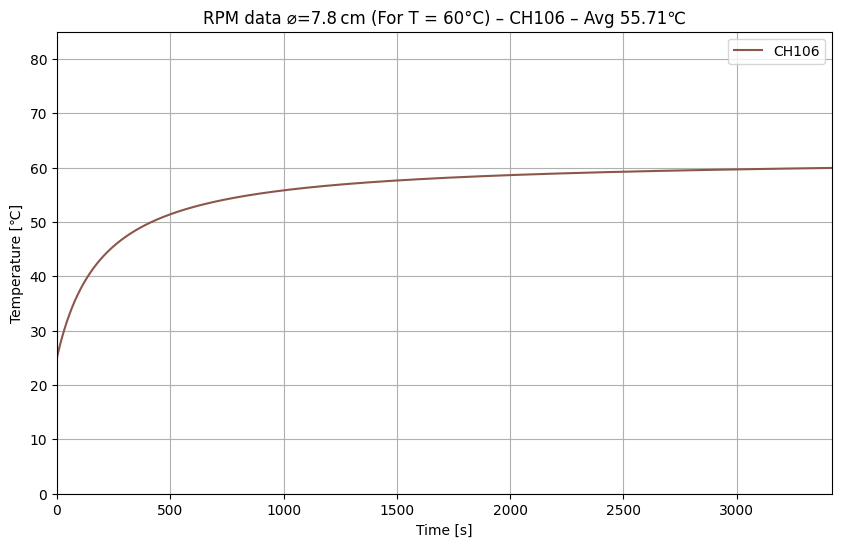

   Saved plots_rpm/RPM_For_T_60_C_CH107.png


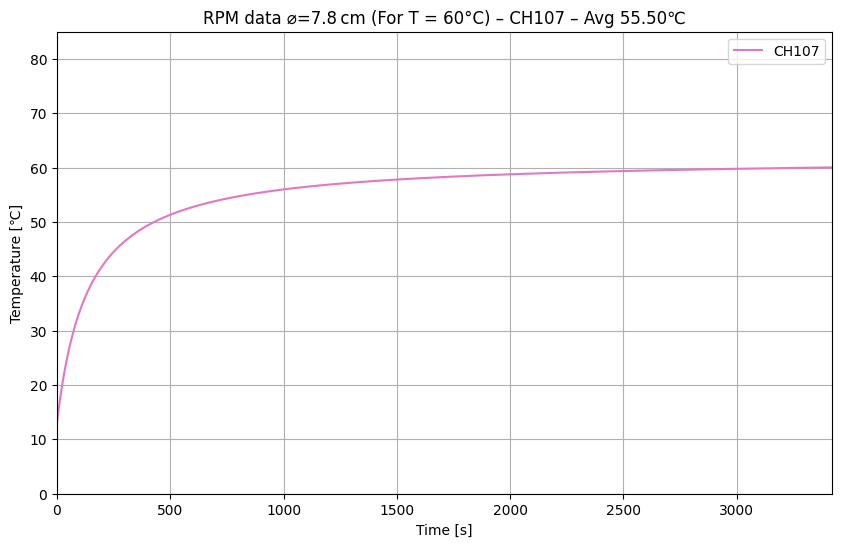

   Saved plots_rpm/RPM_For_T_60_C_CH108.png


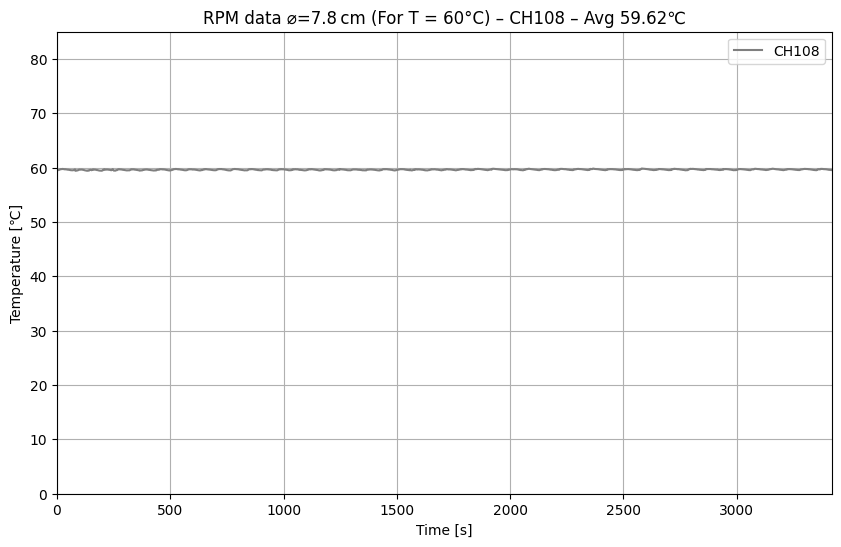

→ Using RPM_data_For T = 70°C .xlsx for sheet For T = 70°C


<ipython-input-9-011b3d114b61>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i))


   Saved plots_rpm/RPM_For_T_70_C_CH101.png


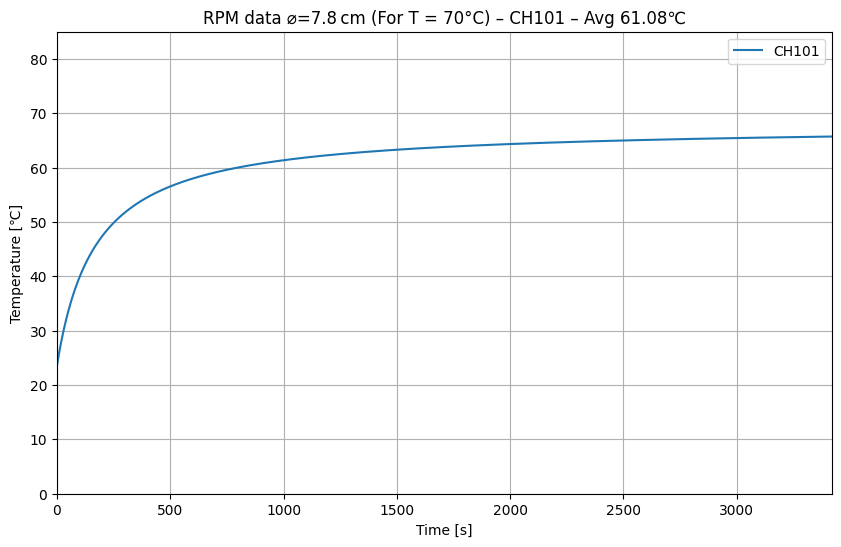

   Saved plots_rpm/RPM_For_T_70_C_CH102.png


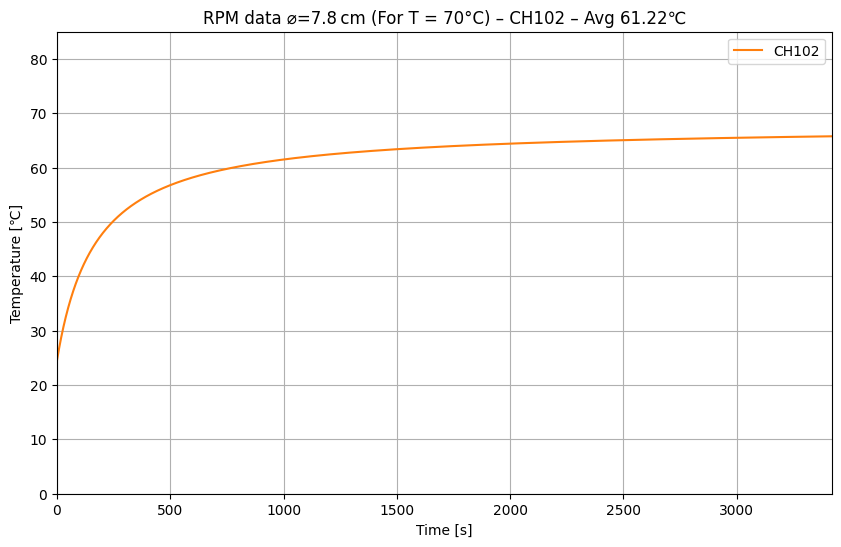

   Saved plots_rpm/RPM_For_T_70_C_CH103.png


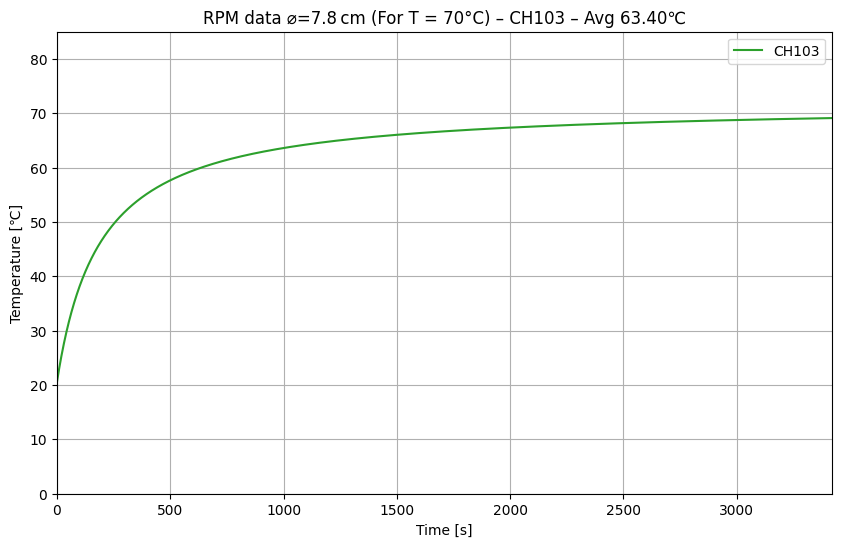

   Saved plots_rpm/RPM_For_T_70_C_CH104.png


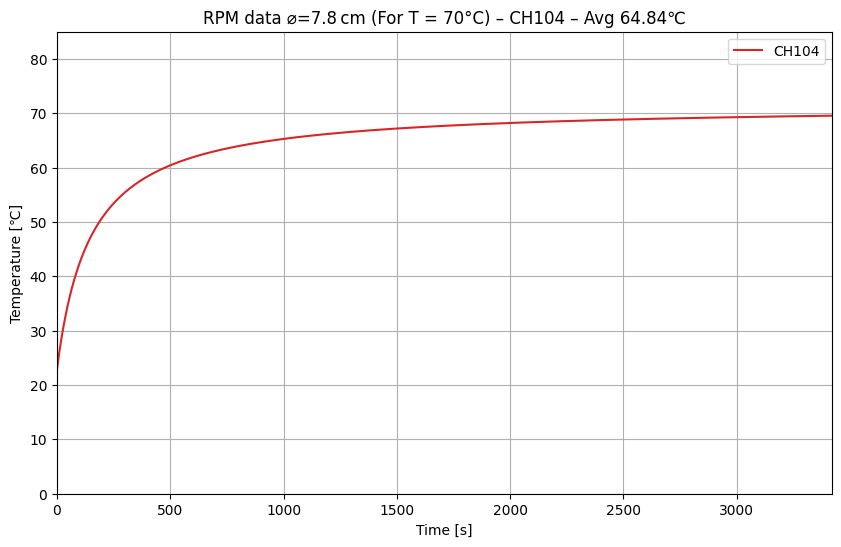

   Saved plots_rpm/RPM_For_T_70_C_CH105.png


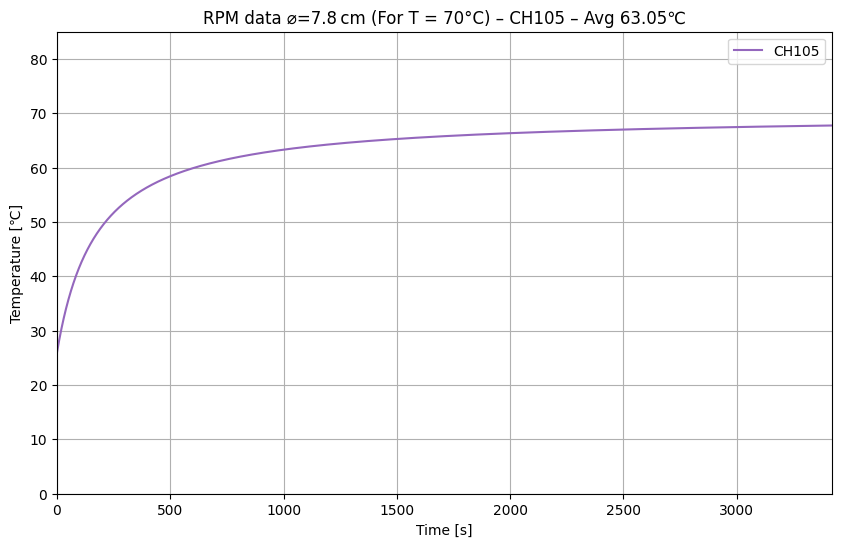

   Saved plots_rpm/RPM_For_T_70_C_CH106.png


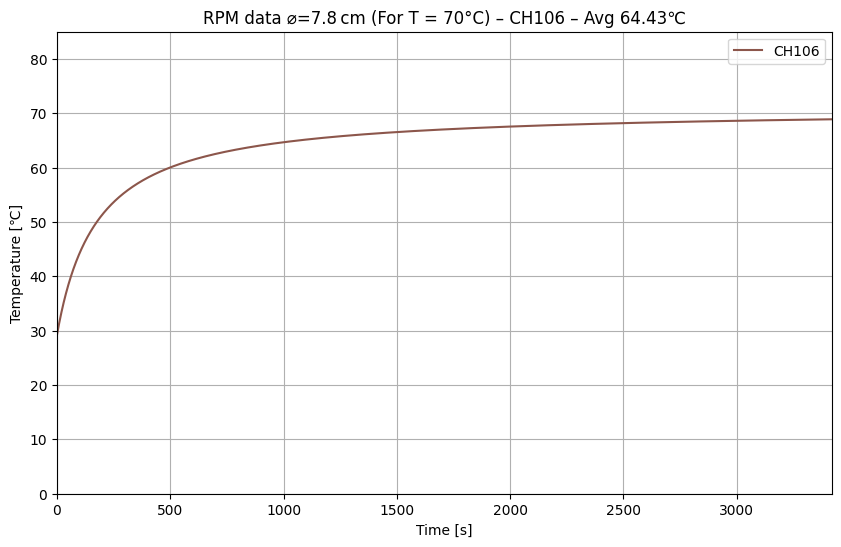

   Saved plots_rpm/RPM_For_T_70_C_CH107.png


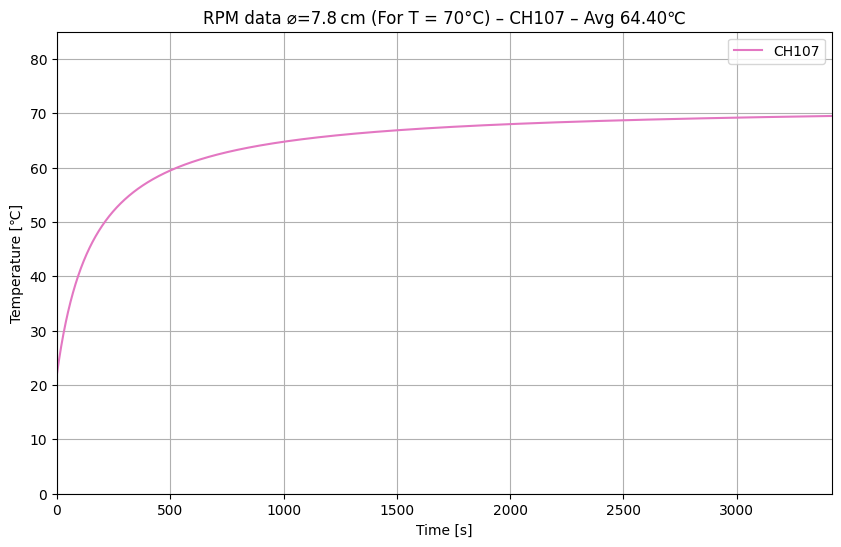

   Saved plots_rpm/RPM_For_T_70_C_CH108.png


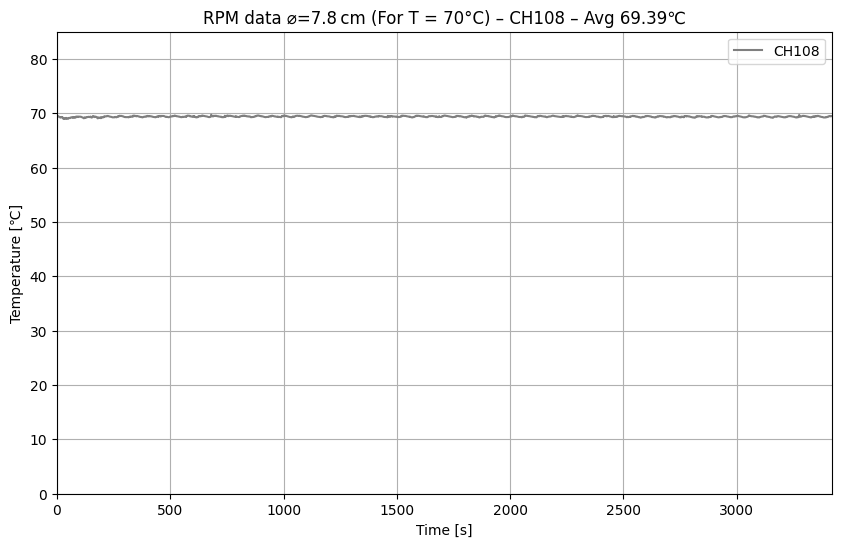

→ Using RPM_data_For T = 80°C .xlsx for sheet For T = 80°C


<ipython-input-9-011b3d114b61>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i))


   Saved plots_rpm/RPM_For_T_80_C_CH101.png


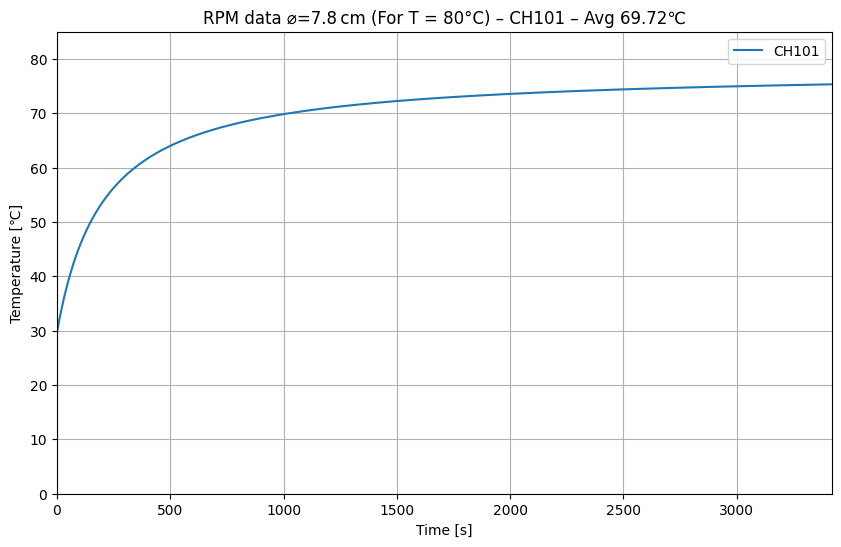

   Saved plots_rpm/RPM_For_T_80_C_CH102.png


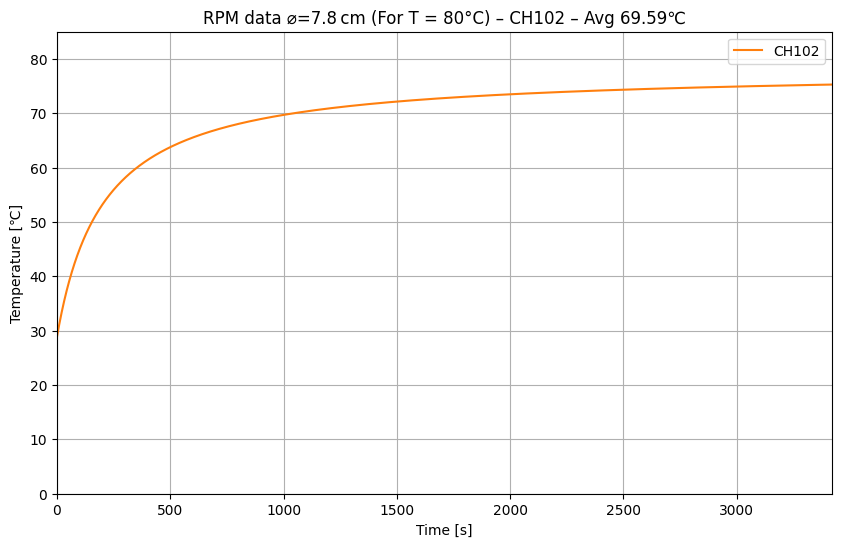

   Saved plots_rpm/RPM_For_T_80_C_CH103.png


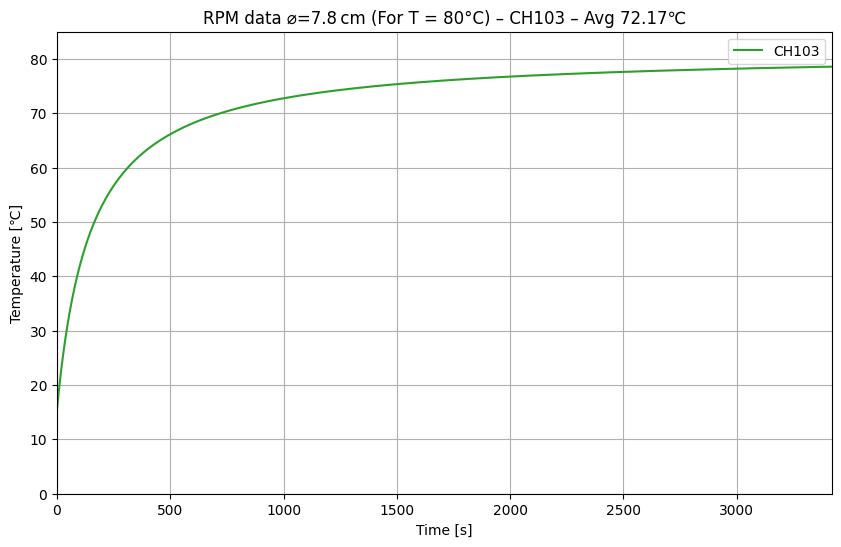

   Saved plots_rpm/RPM_For_T_80_C_CH104.png


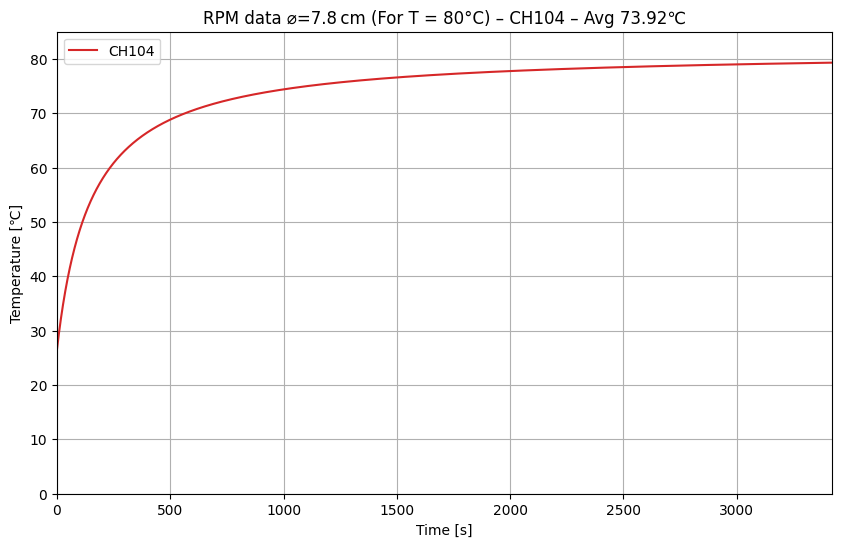

   Saved plots_rpm/RPM_For_T_80_C_CH105.png


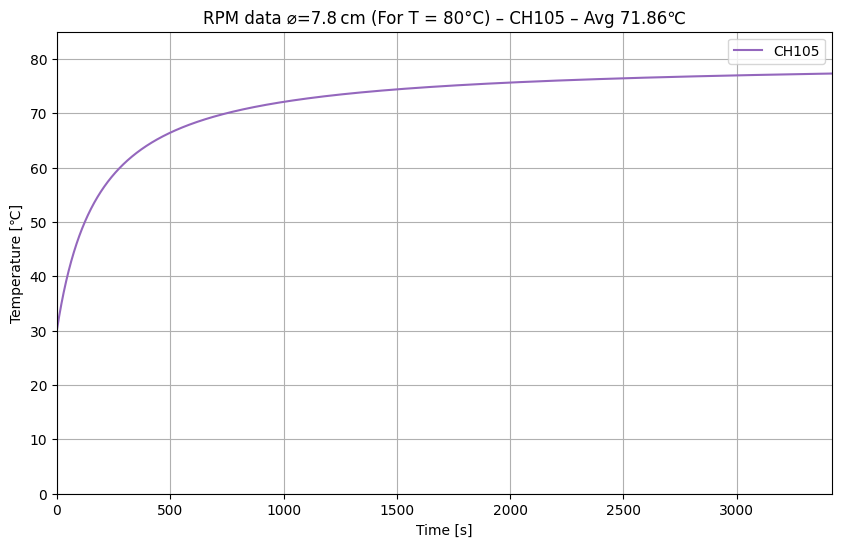

   Saved plots_rpm/RPM_For_T_80_C_CH106.png


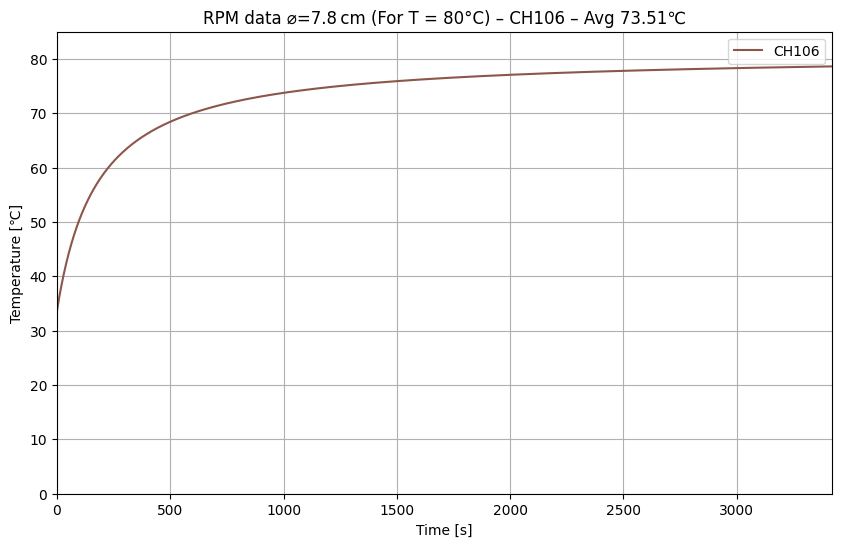

   Saved plots_rpm/RPM_For_T_80_C_CH107.png


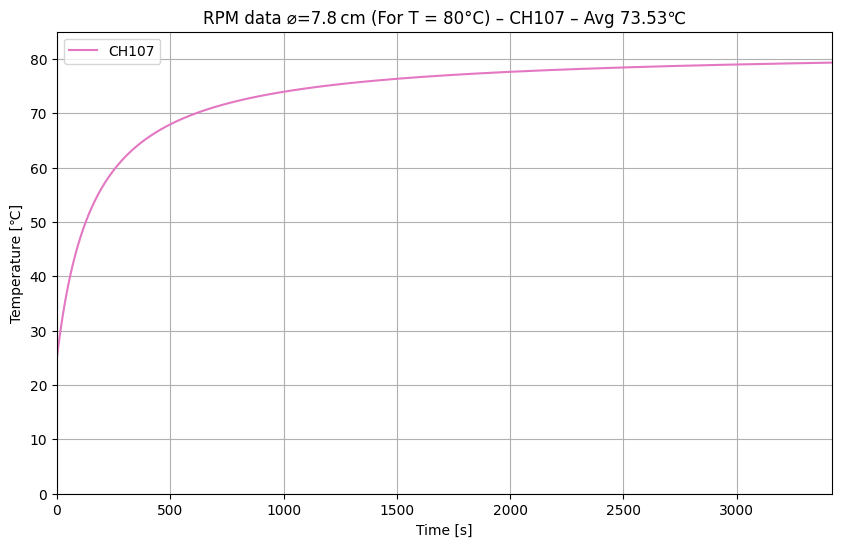

   Saved plots_rpm/RPM_For_T_80_C_CH108.png


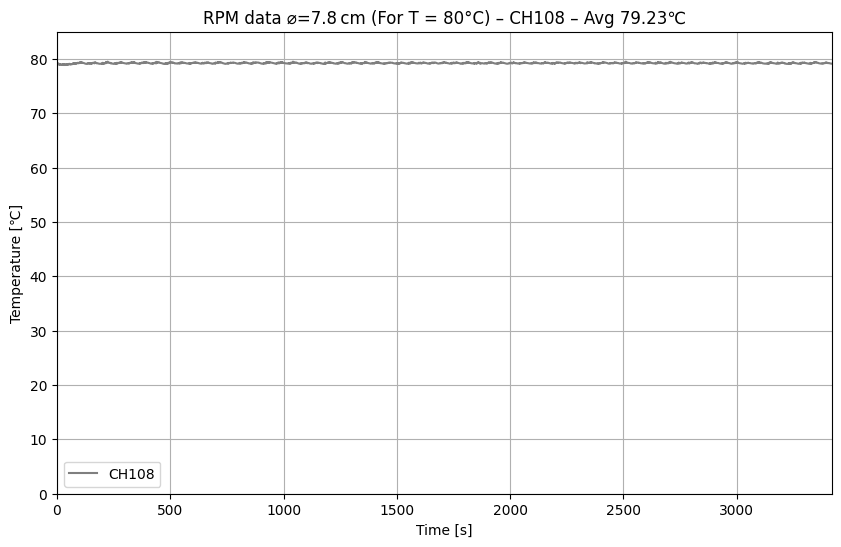

In [ ]:
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd

# VERIFY what you actually uploaded
print("Working dir:", os.getcwd())
print("All Excel files:", glob.glob("*.xlsx"))

sheet_names = ['For T = 50°C ', 'For T = 60°C ', 'For T = 70°C ', 'For T = 80°C ']

# create output folder
os.makedirs("plots_rpm", exist_ok=True)

for sheet_name in sheet_names:
    # remove the trailing space so we match the basename exactly
    name = sheet_name.strip()   # e.g. "For T = 50°C"

    # find any file containing that exact name
    matches = glob.glob(f"*{name}*.xlsx")
    if not matches:
        raise FileNotFoundError(f"No file matching '*{name}*.xlsx' in {os.getcwd()}")
    # pick the one that starts with "RPM_data"
    rpm_files = [f for f in matches if f.startswith("RPM_data")]
    if not rpm_files:
        raise FileNotFoundError(f"No RPM_data file for '{name}' (candidates: {matches})")
    rpm_fname = rpm_files[0]
    print(f"→ Using {rpm_fname} for sheet {name}")

    # load it
    df = pd.read_excel(rpm_fname)

    # now plot each column vs Time
    for i, column in enumerate(df.columns[1:]):
        plt.figure(figsize=(10,6))
        plt.plot(df['Time'], df[column],
                 label=column,
                 color=plt.cm.get_cmap('tab10')(i))
        avg_temp = df[column].mean()
        plt.title(f'RPM data ⌀=7.8 cm ({name}) – {column} – Avg {avg_temp:.2f}℃')
        plt.xlabel('Time [s]')
        plt.ylabel('Temperature [℃]')
        plt.grid(True)
        plt.xlim(0, 3420)
        plt.ylim(0, 85)
        plt.legend()

        # sanitize for filename
        safe_sheet = re.sub(r'[^0-9A-Za-z]+', '_', name).strip('_')
        safe_col   = re.sub(r'[^0-9A-Za-z]+', '_', column).strip('_')
        out_png = os.path.join("plots_rpm", f"RPM_{safe_sheet}_{safe_col}.png")

        # save + show
        plt.savefig(out_png, dpi=300, bbox_inches='tight')
        print(f"   Saved {out_png}")
        plt.show()
